# Analysis
This notebook contains the code snippets used to analyze and visualize the experimental results demonstrated in the paper.

In [ ]:
# %cd {PATH_TO_THE_IASC_BASE_DIRECTORY}

## Retrieve the results

In [2]:
import json
import os

ICL = ["icl", "no-icl"]
LANGUAGES = ["arabic", "fijian", "french", "hard", "hixkaryana", "mizo", "turkish", "vietnamese", "welsh"]

eval_dir = "evaluation/results"
stats = {}

models = ["claude-3-5-sonnet",
          "gemini-2.5-flash", "gemini-2.5-pro",
          "gpt-4o-mini", "gpt-5-mini", "gpt-5"]

for model in models:
    stats[model] = {}
    
    for icl in ICL:
        for lang in LANGUAGES:
            if icl == "icl":
                lang_dir = f"{lang}_icl"
            else:
                lang_dir = lang
            results_path = os.path.join(eval_dir,
                                        model,
                                        lang_dir,
                                        "scores_0_0.json")
            if not os.path.exists(results_path):
                stats[model][lang_dir] = None
                print(f"{results_path} not found. Skipping...")
                continue
            
            with open(results_path, "r") as f:
                res = json.load(f)
            stats[model][lang_dir] = res

stats

{'claude-3-5-sonnet': {'arabic_icl': {'BLEU': 0.0,
   'ChrF++': 5.458515283842795,
   'WER': 48.821548821548824,
   'CER': 17.693409742120345,
   'TER': 60.60606060606061,
   'SER': 0.0,
   'MFER': 26.565961732124865,
   'MSER': 13.282980866062433,
   'Lemma precision': 98.68518518518518,
   'Lemma recall': 96.45502645502644,
   'Lemma F1': 97.48100664767327},
  'fijian_icl': {'BLEU': 0.1810453845367088,
   'ChrF++': 11.8657937806874,
   'WER': 26.25,
   'CER': 16.729500471253534,
   'TER': 22.499999999999996,
   'SER': 15.41095890410959,
   'MFER': 13.316582914572864,
   'MSER': 14.363770909341227,
   'Lemma precision': 81.85626102292768,
   'Lemma recall': 81.70017636684302,
   'Lemma F1': 81.48748312422202},
  'french_icl': {'BLEU': 0.12193116276731476,
   'ChrF++': 6.424900057110222,
   'WER': 38.082191780821915,
   'CER': 22.416492693110648,
   'TER': 73.97260273972603,
   'SER': 15.050167224080266,
   'MFER': 19.544626593806925,
   'MSER': 17.297396908943597,
   'Lemma precision'

## Visualize with matplotlib

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Dict, Any


def visualize_results(stats: Dict[str, Any],
                      metric: str,
                      icl: bool) -> None:
    models = ["claude-3-5-sonnet",
            "gemini-2.5-flash",
            "gemini-2.5-pro",
            "gpt-4o-mini",
            "gpt-5-mini",
            "gpt-5"]
    
    languages = ["arabic", "fijian", "french", "hard", "hixkaryana", "mizo", "turkish", "vietnamese", "welsh"]
    languages_icl = [lang + "_icl" for lang in languages]

    x = np.arange(len(LANGUAGES))
    width = 0.7 / len(models)

    if icl:
        values = np.array([
            [stats[model][lang][metric] for model in models]
            for lang in languages_icl
        ])
    else:
        values = np.array([
            [stats[model][lang][metric] for model in models]
            for lang in languages
        ])

    fig, ax = plt.subplots(figsize=(15, 6))

    for i, model in enumerate(models):
        ax.bar(
            x + i * width,
            values[:, i],
            width,
            label=model
        )

    ax.set_xticks(x + width * (len(models) - 1) / 2)
    ax.set_xticklabels(languages,
                    rotation=30,
                    ha="right",
                    fontsize=12)

    ax.set_ylabel(metric,
                  fontsize=12)
    ax.set_ylim(0, 100)
    ax.set_xlabel("Language",
                  fontsize=14)
    ax.set_title(f"{metric} by language and model")
    ax.legend(title="Model",
              fontsize=10,EncodingWarning
              title_fontsize=10,
            #   bbox_to_anchor=(1.1, 1)
              )

    plt.tight_layout()
    plt.show()

### MSER (Morphosyntactic Error Rate)

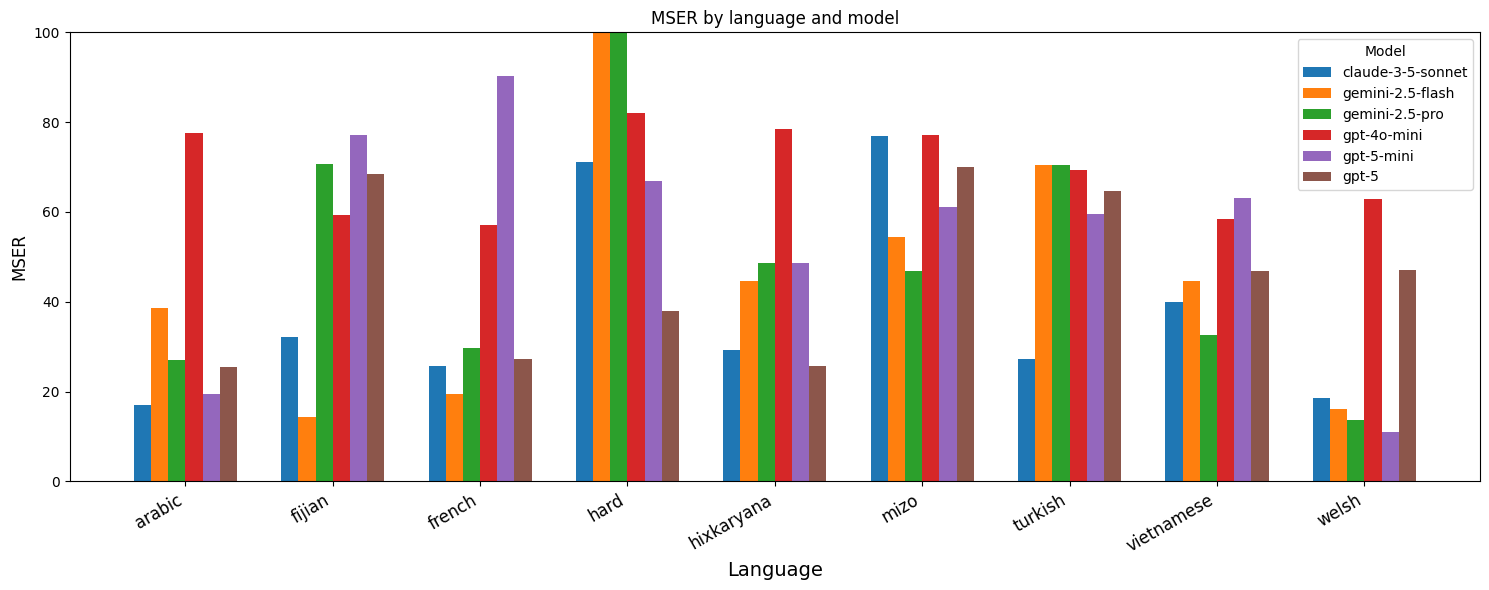

In [49]:
visualize_results(stats=stats,
                  metric="MSER",
                  icl=False)

### Prepare TeX code for generating the plot

In [92]:
from __future__ import annotations

from typing import Dict, Any, List, Optional, Tuple


def _latex_escape(s: str) -> str:
    """
    Escape common LaTeX special chars for text contexts.
    """
    repl = {
        "\\": r"\textbackslash{}",
        "&": r"\&",
        "%": r"\%",
        "$": r"\$",
        "#": r"\#",
        "_": r"\_",
        "{": r"\{",
        "}": r"\}",
        "~": r"\textasciitilde{}",
        "^": r"\textasciicircum{}",
    }
    return "".join(repl.get(ch, ch) for ch in s)


model_map = {
    "claude-3-5-sonnet": "Claude 3.5 Sonnet",
    "gemini-2.5-flash": "Gemini 2.5 Flash",
    "gemini-2.5-pro": "Gemini 2.5 Pro",
    "gpt-4o-mini": "GPT-4o-mini",
    "gpt-5-mini": "GPT-5-mini",
    "gpt-5": "GPT-5"
}


def pgfplots_grouped_bar_tex_with_caption_legend(
    stats: Dict[str, Any],
    metric: str,
    icl: bool,
    *,
    models: Optional[List[str]] = None,
    languages: Optional[List[str]] = None,
    # Figure sizing
    width_cm: float = 16.4,
    height_cm: float = 6.0,
    # Axis
    ymin: float = 0.0,
    ymax: float = 100.0,
    rotate_xticks: int = 30,
    # Bar geometry
    bar_width_pt: float = 6.0,
    no_gap_within_group: bool = True,
    # Caption / title text
    title: Optional[str] = None,
    caption_prefix: Optional[str] = None,
    label: Optional[str] = None,
    # Colors: if None, uses a Matplotlib-like default palette (hex)
    model_colors: Optional[Dict[str, str]] = None,
    # Cosmetic
    fill_opacity: float = 1.0,
) -> Tuple[str, str]:
    """
    Generate TeX code for a PGFPlots grouped bar chart with *no legend inside the plot*.
    Instead, generate a caption-friendly legend made of colored boxes.

    Returns:
        (figure_tex, preamble_tex)

    figure_tex: a full figure environment (figure + tikzpicture + axis + caption).
    preamble_tex: macros + color definitions you should paste into your LaTeX preamble.

    Expected stats structure:
        stats[model][lang_key][metric] -> float
    where lang_key is either "arabic" or "arabic_icl" depending on icl.
    """
    if models is None:
        models = [
            "claude-3-5-sonnet",
            "gemini-2.5-flash",
            "gemini-2.5-pro",
            "gpt-4o-mini",
            "gpt-5-mini",
            "gpt-5",
        ]
    if languages is None:
        languages = [
            "arabic", "fijian", "french", "hard", "hixkaryana",
            "mizo", "turkish", "vietnamese", "welsh",
        ]

    # Default palette (Matplotlib tab colors-ish)
    default_hex = [
        "1F77B4",  # blue
        "FF7F0E",  # orange
        "2CA02C",  # green
        "D62728",  # red
        "9467BD",  # purple
        "8C564B",  # brown
        "E377C2",  # pink
        "7F7F7F",  # gray
        "BCBD22",  # olive
        "17BECF",  # cyan
    ]

    if model_colors is None:
        model_colors = {m: default_hex[i % len(default_hex)] for i, m in enumerate(models)}
    else:
        # Ensure every model has a color; fall back if missing.
        for i, m in enumerate(models):
            model_colors.setdefault(m, default_hex[i % len(default_hex)])

    lang_keys = [f"{l}_icl" for l in languages] if icl else languages

    # --- Preamble TeX: packages, legendbox macro, and color definitions ---
    # Users may already have xcolor/tikz; but including is harmless.
    preamble_lines: List[str] = [
        r"% --- Add these to your LaTeX preamble ---",
        r"\usepackage{xcolor}",
        r"\usepackage{tikz}",
        r"\usepackage{pgfplots}",
        r"\pgfplotsset{compat=1.18}",
        r"",
        r"% Small colored square for caption legends",
        r"\newcommand{\legendbox}[1]{%",
        r"  \tikz[baseline=-0.6ex]\draw[draw=#1, fill=#1] (0,0) rectangle (0.22,0.22);%",
        r"}",
        r"",
        r"% Model colors",
    ]

    color_name_for_model: Dict[str, str] = {}
    for i, m in enumerate(models):
        cname = f"model{i+1}"
        color_name_for_model[m] = cname
        hexcode = model_colors[m].lstrip("#")
        preamble_lines.append(rf"\definecolor{{{cname}}}{{HTML}}{{{hexcode}}}")

    preamble_tex = "\n".join(preamble_lines) + "\n"

    # --- Build addplots (NO in-plot legend entries) ---
    addplots: List[str] = []
    N = len(models)
    W = bar_width_pt

    # Compute bar shifts so bars are adjacent with *no gap* within each language group.
    # If no_gap_within_group is False, we let PGFPlots auto-shift (may introduce small gaps).
    shifts_pt: List[Optional[float]] = []
    if no_gap_within_group:
        for i in range(N):
            shift = (i - (N - 1) / 2) * W
            shifts_pt.append(shift)
    else:
        shifts_pt = [None] * N

    for i, model in enumerate(models):
        coords = []
        for lang_label, lang_key in zip(languages, lang_keys):
            try:
                val = stats[model][lang_key][metric]
                coords.append(f"({lang_label},{float(val):.6f})")
            except Exception:
                coords.append(f"({lang_label},nan)")

        cname = color_name_for_model[model]
        shift_opt = "" if shifts_pt[i] is None else f", bar shift={shifts_pt[i]:.2f}pt"
        opacity_opt = "" if fill_opacity >= 1.0 else f", fill opacity={fill_opacity:.3f}"

        addplots.append(
            rf"\addplot+[ybar, draw={cname}, fill={cname}{opacity_opt}{shift_opt}] coordinates {{"
            "\n    " + "\n    ".join(coords) + "\n};\n"
        )

    metric_esc = _latex_escape(metric)
    plot_title = title if title is not None else f"{metric} by language and model"
    title_esc = _latex_escape(plot_title)

    # --- Caption with colored boxes ---
    cap_prefix = caption_prefix if caption_prefix is not None else plot_title
    cap_prefix_esc = _latex_escape(cap_prefix)

    caption_parts: List[str] = [cap_prefix_esc]
    for j, model in enumerate(models):
        cname = color_name_for_model[model]
        model_esc = _latex_escape(model_map[model])
        # use \quad between items; line breaks can be added if needed
        sep = r"\quad " if j < len(models) - 1 else ""
        caption_parts.append(rf"\legendbox{{{cname}}} {model_esc}{sep}")

    caption_tex = "".join(caption_parts) + "."

    # --- Figure / Axis TeX ---
    # Note: no legend settings here at all.
    figure_tex = f"""\\begin{{figure*}}
\\centering
\\begin{{tikzpicture}}
\\begin{{axis}}[
    width={width_cm:.2f}cm,
    height={height_cm:.2f}cm,
    ybar,
    bar width={bar_width_pt:.2f}pt,
    ymin={ymin},
    ymax={ymax},
    unbounded coords=jump,
    enlarge x limits=0.08,
    ylabel={{{metric_esc}}},
    ylabel shift=-6pt,
    xlabel={{Language}},
    xlabel shift=-4pt,
    title={{{title_esc}}},
    symbolic x coords={{{{ {",".join(languages)} }}}},
    xtick=data,
    x tick label style={{rotate={rotate_xticks}, anchor=east, font=\\fontsize{{11}}{{12}}\\selectfont}},
    ylabel style={{font=\\fontsize{{11}}{{12}}\\selectfont}},
    xlabel style={{font=\\fontsize{{11}}{{12}}\\selectfont}},
]

{''.join(addplots).rstrip()}

\\end{{axis}}
\\end{{tikzpicture}}
\\caption{{{caption_tex}}}
\\label{{{label}}}
\\end{{figure*}}
"""
    return figure_tex, preamble_tex


In [94]:
fig_tex, preamble_tex = pgfplots_grouped_bar_tex_with_caption_legend(
    stats,
    metric="MSER",
    icl=True,
    ymax=100,
    bar_width_pt=5.5,
    no_gap_within_group=True,  # bars touch, no gaps
    fill_opacity=1.0,
    title="",
    caption_prefix="MSER by model and language. ",
    label="fig:mser-results"
)

# print(preamble_tex)
print(fig_tex)


\begin{figure*}
\centering
\begin{tikzpicture}
\begin{axis}[
    width=16.40cm,
    height=6.00cm,
    ybar,
    bar width=5.50pt,
    ymin=0.0,
    ymax=100,
    unbounded coords=jump,
    enlarge x limits=0.08,
    ylabel={MSER},
    ylabel shift=-6pt,
    xlabel={Language},
    xlabel shift=-4pt,
    title={},
    symbolic x coords={{ arabic,fijian,french,hard,hixkaryana,mizo,turkish,vietnamese,welsh }},
    xtick=data,
    x tick label style={rotate=30, anchor=east, font=\fontsize{11}{12}\selectfont},
    ylabel style={font=\fontsize{11}{12}\selectfont},
    xlabel style={font=\fontsize{11}{12}\selectfont},
]

\addplot+[ybar, draw=model1, fill=model1, bar shift=-13.75pt] coordinates {
    (arabic,13.282981)
    (fijian,14.363771)
    (french,17.297397)
    (hard,46.800303)
    (hixkaryana,45.952392)
    (mizo,54.293002)
    (turkish,13.673490)
    (vietnamese,16.960765)
    (welsh,4.485364)
};
\addplot+[ybar, draw=model2, fill=model2, bar shift=-8.25pt] coordinates {
    (arabic,20

In [74]:
print(preamble_tex)

% --- Add these to your LaTeX preamble ---
\usepackage{xcolor}
\usepackage{tikz}
\usepackage{pgfplots}
\pgfplotsset{compat=1.18}

% Small colored square for caption legends
\newcommand{\legendbox}[1]{%
  \tikz[baseline=-0.6ex]\draw[draw=#1, fill=#1] (0,0) rectangle (0.22,0.22);%
}

% Model colors
\definecolor{model1}{HTML}{1F77B4}
\definecolor{model2}{HTML}{FF7F0E}
\definecolor{model3}{HTML}{2CA02C}
\definecolor{model4}{HTML}{D62728}
\definecolor{model5}{HTML}{9467BD}
\definecolor{model6}{HTML}{8C564B}



### Lemma F1 scores

In [108]:
import numpy as np

scores_list = {}
for lang in LANGUAGES:
    scores = np.array([scores[lang]["Lemma F1"] for model, scores in stats.items()], dtype=float)
    scores_list[lang] = scores.mean()

In [109]:
scores_list

{'arabic': np.float64(79.86724074447861),
 'fijian': np.float64(59.01950922041177),
 'french': np.float64(75.01909651256425),
 'hard': np.float64(44.90188995023601),
 'hixkaryana': np.float64(74.63165279470748),
 'mizo': np.float64(57.839512201707265),
 'turkish': np.float64(76.81287564758496),
 'vietnamese': np.float64(60.34631706570131),
 'welsh': np.float64(81.29939319112006)}

## Statistical significance tests

### Any performance difference between larger LLMs and smaller LLMs?

In [ ]:
from __future__ import annotations

import numpy as np
import pandas as pd

from scipy.stats import pointbiserialr, mannwhitneyu

HIGH_INTEL_MODELS = {
    "claude-3-5-sonnet",
    "gemini-2.5-pro",
    "gpt-5",
}

rows = []
for model_name, conds in stats.items():
    for condition_name, metrics in conds.items():
        if "MSER" not in metrics:
            continue
        rows.append(
            {
                "model": model_name,
                "condition": condition_name,
                "MSER": float(metrics["MSER"]),
                "high_intelligence": int(model_name in HIGH_INTEL_MODELS),
            }
        )

df = pd.DataFrame(rows)

# Optional: if you want to exclude *_icl or include only *_icl, uncomment one:
# df = df[~df["condition"].str.endswith("_icl")]   # only non-ICL
# df = df[df["condition"].str.endswith("_icl")]    # only ICL

# ---- 1) Point-biserial correlation: corr(MSER, high_intelligence) ----
# NOTE: This is exactly Pearson correlation when one variable is 0/1.
r, p = pointbiserialr(df["high_intelligence"].to_numpy(), df["MSER"].to_numpy())
print(f"Point-biserial r = {r:.4f}, p = {p:.4g}  (n={len(df)})")

# ---- 2) Mann–Whitney U: do high-intel and low-intel have different MSER distributions? ----
mser_hi = df.loc[df["high_intelligence"] == 1, "MSER"].to_numpy()
mser_lo = df.loc[df["high_intelligence"] == 0, "MSER"].to_numpy()

u, p_u = mannwhitneyu(mser_hi, mser_lo, alternative="two-sided")
print(f"Mann–Whitney U = {u:.3f}, p = {p_u:.4g}  (n_hi={len(mser_hi)}, n_lo={len(mser_lo)})")

# ---- quick descriptive stats ----
print("\nGroup means:")
print(df.groupby("high_intelligence")["MSER"].mean().rename({0: "low", 1: "high"}))

Point-biserial r = -0.3102, p = 0.001086  (n=108)
Mann–Whitney U = 906.000, p = 0.0007023  (n_hi=54, n_lo=54)

Group means:
high_intelligence
low     52.230429
high    35.393262
Name: MSER, dtype: float64


In [104]:
import numpy as np

scores_list = {}
for lang in LANGUAGES:
    scores = np.array([scores[lang]["MSER"] for model, scores in stats.items()], dtype=float)
    scores_list[lang] = scores.mean()

In [105]:
scores_list

{'arabic': np.float64(34.21221359095877),
 'fijian': np.float64(53.66869057151752),
 'french': np.float64(41.58868312674471),
 'hard': np.float64(85.20757291475908),
 'hixkaryana': np.float64(45.90104596932199),
 'mizo': np.float64(64.41120279277),
 'turkish': np.float64(60.280539606276854),
 'vietnamese': np.float64(47.5890699090729),
 'welsh': np.float64(28.257194741490935)}

### Any correlation between lemmatization performance and typology?

In [ ]:
from __future__ import annotations

import numpy as np
import pandas as pd
from scipy.stats import spearmanr, kruskal


# Language -> inflection level (ordinal)
LANG_TO_TYPE = {
    # analytic
    "fijian": 0,
    "vietnamese": 0,
    "mizo": 0,

    # inflecting
    "hixkaryana": 1,
    "arabic": 1,
    "french": 1,
    "hard": 1,
    "turkish": 1,
    "welsh": 1
}
# This classification is based on WALS.

TYPE_NAME = {0: "analytic", 1: "synthetic"}

def base_lang(condition_name: str) -> str:
    """
    Map keys like 'fijian_icl' -> 'fijian', and 'fijian' -> 'fijian'.
    """
    return condition_name[:-4] if condition_name.endswith("_icl") else condition_name

rows = []
for model_name, conds in stats.items():
    for condition_name, metrics in conds.items():
        lang = base_lang(condition_name)
        if lang not in LANG_TO_TYPE:
            continue
        if "Lemma F1" not in metrics:
            continue
        rows.append(
            {
                "model": model_name,
                "condition": condition_name,
                "lang": lang,
                "inflection_level": LANG_TO_TYPE[lang],  # 0/1/2
                "inflection_type": TYPE_NAME[LANG_TO_TYPE[lang]],
                "lemma_f1": float(metrics["Lemma F1"]),
            }
        )

df = pd.DataFrame(rows)

# Optional: if you want to analyze only ICL or only non-ICL, uncomment:
# df = df[df["condition"].str.endswith("_icl")]     # only ICL
# df = df[~df["condition"].str.endswith("_icl")]    # only non-ICL

# ---- 1) Correlation: Lemma F1 vs inflection_level (ordinal) ----
rho, p = spearmanr(df["inflection_level"].to_numpy(), df["lemma_f1"].to_numpy())
print(f"Spearman rho = {rho:.4f}, p = {p:.4g} (n={len(df)})")

# ---- 2) Group difference sanity-check: Kruskal–Wallis across 3 types ----
groups = [df.loc[df["inflection_level"] == k, "lemma_f1"].to_numpy() for k in [0, 1]]
H, p_kw = kruskal(*groups)
print(f"Kruskal–Wallis H = {H:.4f}, p = {p_kw:.4g}")

# ---- Quick descriptives ----
print("\nGroup means:")
print(df.groupby("inflection_type")["lemma_f1"].mean().sort_index())


Spearman rho = 0.3427, p = 0.0002823 (n=108)
Kruskal–Wallis H = 12.5695, p = 0.0003921

Group means:
inflection_type
analytic     65.102029
synthetic    77.127861
Name: lemma_f1, dtype: float64


In [117]:
# ---- 1) Point-biserial correlation: corr(MSER, high_intelligence) ----
# NOTE: This is exactly Pearson correlation when one variable is 0/1.
r, p = pointbiserialr(df["inflection_level"].to_numpy(), df["lemma_f1"].to_numpy())
print(f"Point-biserial r = {r:.4f}, p = {p:.4g}  (n={len(df)})")

analytic = df.loc[df["inflection_level"] == 0, "lemma_f1"].to_numpy()
synthetic = df.loc[df["inflection_level"] == 1, "lemma_f1"].to_numpy()

u, p_u = mannwhitneyu(mser_hi, mser_lo, alternative="two-sided")
print(f"Mann–Whitney U = {u:.3f}, p = {p_u:.4g}  (n_hi={len(mser_hi)}, n_lo={len(mser_lo)})")

# ---- quick descriptive stats ----
print("\nGroup means:")
print(df.groupby("inflection_level")["lemma_f1"].mean().rename({0: "analytic", 1: "synthetic"}))

Point-biserial r = 0.3174, p = 0.0008178  (n=108)
Mann–Whitney U = 906.000, p = 0.0007023  (n_hi=54, n_lo=54)

Group means:
inflection_level
analytic     65.102029
synthetic    77.127861
Name: lemma_f1, dtype: float64


### Any correlatoin between word order and the stem error rates (SER)?

In [53]:
import pandas as pd
from scipy.stats import spearmanr, pointbiserialr

word_orders = {
    "SOV": 564,
    "SVO": 488,
    "VSO": 95,
    "VOS": 25,
    "OVS": 11,
    "OSV": 4
}

word_order_class = {
    "SOV": 0,
    "SVO": 0,
    "VSO": 0,
    "VOS": 1,
    "OVS": 1,
    "OSV": 1,
}

lang_word_orders = {
    "arabic": "VSO",
    "fijian": "VOS",
    "french": "SVO",
    "hard": "OSV",
    "hixkaryana": "OVS",
    "mizo": "OSV",
    "turkish": "SOV",
    "vietnamese": "SVO",
    "welsh": "VSO"
}

def base_lang(condition_name: str) -> str:
    """
    Map keys like 'fijian_icl' -> 'fijian', and 'fijian' -> 'fijian'.
    """
    return condition_name[:-4] if condition_name.endswith("_icl") else condition_name

rows = []
for model_name, conds in stats.items():
    for condition_name, metrics in conds.items():
        lang = base_lang(condition_name)
        if lang not in lang_word_orders.keys():
            continue
        if "SER" not in metrics:
            continue
        rows.append(
            {
                "model": model_name,
                "condition": condition_name,
                "lang": lang,
                # "inflection_level": LANG_TO_TYPE[lang],  # 0/1/2
                # "inflection_type": TYPE_NAME[LANG_TO_TYPE[lang]],
                "word_order": lang_word_orders[lang],
                "word_order_freq": word_orders[lang_word_orders[lang]],
                "word_order_type": word_order_class[lang_word_orders[lang]],
                "SER": float(metrics["SER"]),
            }
        )
        
df = pd.DataFrame(rows)

# Optional: if you want to analyze only ICL or only non-ICL, uncomment:
# df = df[df["condition"].str.endswith("_icl")]     # only ICL
# df = df[~df["condition"].str.endswith("_icl")]    # only non-ICL

# ---- 1) Correlation: Lemma F1 vs inflection_level (ordinal) ----
rho, p = spearmanr(df["word_order_freq"].to_numpy(), df["SER"].to_numpy())
print(f"Spearman rho = {rho:.4f}, p = {p:.4g} (n={len(df)})")

r, p = pointbiserialr(df["word_order_type"].to_numpy(), df["SER"].to_numpy())
print(f"Point-biserial r = {r:.4f}, p = {p:.4g}  (n={len(df)})")

Spearman rho = -0.1594, p = 0.0995 (n=108)
Point-biserial r = 0.2869, p = 0.002605  (n=108)


In [50]:
df[["word_order_freq", "SER"]].corr()

,word_order_freq,SER
word_order_freq,1.000000,-0.029847
SER,-0.029847,1.000000


### Miscellaneous code snippets used to generate the TeX tables used in the paper

In [22]:
tex_prefix = """\\begin{table*}[t]
\\centering
\\setlength{\\tabcolsep}{4pt}
\\small
\\begin{tabular}{@{}lllrrrrrrrr@{}} \\toprule
    Model & Language & ICL & ChrF++ & WER & CER & TER & SER & MFER & MSER & LemF1 \\\\ \\midrule
"""

tex_suffix = """\\end{tabular}
\\caption{Average scores over languages by models comparing performance with and without a few-shot in-context learning stage.}
\\label{tab:morph-results-icl}
\\end{table*}
"""

langs = ["arabic", "fijian", "french", "hixkaryana", "mizo", "turkish", "welsh", "vietnamese", "hard"]

tex = ""
for i, (model, lang_metrics) in enumerate(stats.items()):
    tex += f"    {model} "
    # for lang in langs:
    #     results_noicl = lang_metrics[lang]
    #     tex += f"    & {lang} & No & {results_noicl['ChrF++']:.2f} & {results_noicl['WER']:.2f} & {results_noicl['CER']:.2f} & {results_noicl['TER']:.2f} & {results_noicl['SER']:.2f} & {results_noicl['MFER']:.2f} & {results_noicl['MSER']:.2f} & {results_noicl['Lemma F1']:.2f} \\\\\n"
    #     results_icl = lang_metrics[f"{lang}_icl"]
    #     tex += f"    & & Yes & {results_icl['ChrF++']:.2f} & {results_icl['WER']:.2f} & {results_icl['CER']:.2f} & {results_icl['TER']:.2f} & {results_icl['SER']:.2f} & {results_icl['MFER']:.2f} & {results_icl['MSER']:.2f} & {results_icl['Lemma F1']:.2f} \\\\\n"
    # tex += "    \\cmidrule{2-11}\n"
    avg_chrf = sum(lang_metrics[l]["ChrF++"] for l in langs) / len(langs)
    avg_wer = sum(lang_metrics[l]["WER"] for l in langs) / len(langs)
    avg_cer = sum(lang_metrics[l]["CER"] for l in langs) / len(langs)
    avg_ter = sum(lang_metrics[l]["TER"] for l in langs) / len(langs)
    avg_ser = sum(lang_metrics[l]["SER"] for l in langs) / len(langs)
    avg_mfer = sum(lang_metrics[l]["MFER"] for l in langs) / len(langs)

    avg_mser = sum(lang_metrics[l]["MSER"] for l in langs) / len(langs)
    avg_lemf1 = sum(lang_metrics[l]["Lemma F1"] for l in langs) / len(langs)
    tex += f"& Average & No & {avg_chrf:.2f} & {avg_wer:.2f} & {avg_cer:.2f} & {avg_ter:.2f} & {avg_ser:.2f} & {avg_mfer:.2f} & {avg_mser:.2f} & {avg_lemf1:.2f} \\\\\n"
    
    avg_chrf_icl = sum(lang_metrics[f"{l}_icl"]["ChrF++"] for l in langs) / len(langs)
    avg_wer_icl = sum(lang_metrics[f"{l}_icl"]["WER"] for l in langs) / len(langs)
    avg_cer_icl = sum(lang_metrics[f"{l}_icl"]["CER"] for l in langs) / len(langs)
    avg_ter_icl = sum(lang_metrics[f"{l}_icl"]["TER"] for l in langs) / len(langs)
    avg_ser_icl = sum(lang_metrics[f"{l}_icl"]["SER"] for l in langs) / len(langs)
    avg_mfer_icl = sum(lang_metrics[f"{l}_icl"]["MFER"] for l in langs) / len(langs)
    avg_mser_icl = sum(lang_metrics[f"{l}_icl"]["MSER"] for l in langs) / len(langs)
    avg_lemf1_icl = sum(lang_metrics[f"{l}_icl"]["Lemma F1"] for l in langs) / len(langs)
    tex += f"                            & & Yes & {avg_chrf_icl:.2f} & {avg_wer_icl:.2f} & {avg_cer_icl:.2f} & {avg_ter_icl:.2f} & {avg_ser_icl:.2f} & {avg_mfer_icl:.2f} & {avg_mser_icl:.2f} & {avg_lemf1_icl:.2f} \\\\\n"
        
    if i < len(stats) - 1:
        tex += "    \\midrule\n"
    else:
        tex += "    \\bottomrule\n"

print(tex_prefix + tex + tex_suffix)

\begin{table*}[t]
\centering
\setlength{\tabcolsep}{4pt}
\small
\begin{tabular}{@{}lllrrrrrrrr@{}} \toprule
    Model & Language & ICL & ChrF++ & WER & CER & TER & SER & MFER & MSER & LemF1 \\ \midrule
    claude-3-5-sonnet & Average & No & 7.49 & 73.53 & 47.14 & 77.78 & 33.37 & 41.73 & 37.55 & 76.17 \\
                            & & Yes & 8.41 & 46.64 & 27.49 & 55.22 & 26.29 & 24.18 & 25.23 & 89.13 \\
    \midrule
    gemini-2.5-flash & Average & No & 8.35 & 76.78 & 47.82 & 74.86 & 43.07 & 47.64 & 45.36 & 73.11 \\
                            & & Yes & 8.33 & 49.43 & 27.20 & 48.35 & 18.02 & 24.14 & 21.08 & 89.99 \\
    \midrule
    gemini-2.5-pro & Average & No & 8.53 & 77.25 & 45.13 & 83.00 & 60.80 & 47.57 & 54.18 & 74.38 \\
                            & & Yes & 8.28 & 35.36 & 19.18 & 40.94 & 12.64 & 16.71 & 14.68 & 89.30 \\
    \midrule
    gpt-4o-mini & Average & No & 11.51 & 102.23 & 67.49 & 87.58 & 71.64 & 66.67 & 69.16 & 52.79 \\
                            & & Yes & 11.66 & 101

Given the difficulty of the task, we have also tested the models' performance with an additional stage called ``review'',
where a model is provided with a prompt that contains a summary of the grammar and four example sentences with label glosses.
This allows the model to digest the grammar with a few-shot in-context learning setting.
In this case, as shown Claude 3.5 Sonnet, Gemini 2.5 Flash, Gemini 2.5 Pro, and GPT 5 showed an improvement in most of the metrics.
In particular, a performance boost is observed in the metrics that are specifically designed to measure the performance of this task (SER, MFER, MSER, Lemma F1).

In [ ]:
tex_prefix = """\\begin{table*}[t]
\\centering
\\setlength{\\tabcolsep}{4pt}
\\tiny
\\begin{tabular}{@{}lllrrrrrrrr@{}} \\toprule
    Model & Language & ICL & ChrF++ & WER & CER & TER & SER & MFER & MSER & LemF1 \\\\ \\midrule
"""

tex_suffix = """\\end{tabular}
\\caption{Full results of the Morphosyntax module.}
\\label{tab:full-results}
\\end{table*}
"""

langs = ["arabic", "fijian", "french", "hixkaryana", "mizo", "turkish", "welsh", "vietnamese", "hard"]

tex = ""
for i, (model, lang_metrics) in enumerate(stats.items()):
    tex += f"    {model} "
    for lang in langs:
        results_noicl = lang_metrics[lang]
        tex += f"    & {lang} & No & {results_noicl['ChrF++']:.2f} & {results_noicl['WER']:.2f} & {results_noicl['CER']:.2f} & {results_noicl['TER']:.2f} & {results_noicl['SER']:.2f} & {results_noicl['MFER']:.2f} & {results_noicl['MSER']:.2f} & {results_noicl['Lemma F1']:.2f} \\\\\n"
        # results_icl = lang_metrics[f"{lang}_icl"]
        # tex += f"    & & Yes & {results_icl['ChrF++']:.2f} & {results_icl['WER']:.2f} & {results_icl['CER']:.2f} & {results_icl['TER']:.2f} & {results_icl['SER']:.2f} & {results_icl['MFER']:.2f} & {results_icl['MSER']:.2f} & {results_icl['Lemma F1']:.2f} \\\\\n"
    tex += "    \\cmidrule{2-11}\n"
    avg_chrf = sum(lang_metrics[l]["ChrF++"] for l in langs) / len(langs)
    avg_wer = sum(lang_metrics[l]["WER"] for l in langs) / len(langs)
    avg_cer = sum(lang_metrics[l]["CER"] for l in langs) / len(langs)
    avg_ter = sum(lang_metrics[l]["TER"] for l in langs) / len(langs)
    avg_ser = sum(lang_metrics[l]["SER"] for l in langs) / len(langs)
    avg_mfer = sum(lang_metrics[l]["MFER"] for l in langs) / len(langs)
    avg_mser = sum(lang_metrics[l]["MSER"] for l in langs) / len(langs)
    avg_lemf1 = sum(lang_metrics[l]["Lemma F1"] for l in langs) / len(langs)
    tex += f"    & Average & No & {avg_chrf:.2f} & {avg_wer:.2f} & {avg_cer:.2f} & {avg_ter:.2f} & {avg_ser:.2f} & {avg_mfer:.2f} & {avg_mser:.2f} & {avg_lemf1:.2f} \\\\\n"
    
    # avg_chrf_icl = sum(lang_metrics[f"{l}_icl"]["ChrF++"] for l in langs) / len(langs)
    # avg_wer_icl = sum(lang_metrics[f"{l}_icl"]["WER"] for l in langs) / len(langs)
    # avg_cer_icl = sum(lang_metrics[f"{l}_icl"]["CER"] for l in langs) / len(langs)
    # avg_ter_icl = sum(lang_metrics[f"{l}_icl"]["TER"] for l in langs) / len(langs)
    # avg_ser_icl = sum(lang_metrics[f"{l}_icl"]["SER"] for l in langs) / len(langs)
    # avg_mfer_icl = sum(lang_metrics[f"{l}_icl"]["MFER"] for l in langs) / len(langs)
    # avg_mser_icl = sum(lang_metrics[f"{l}_icl"]["MSER"] for l in langs) / len(langs)
    # avg_lemf1_icl = sum(lang_metrics[f"{l}_icl"]["Lemma F1"] for l in langs) / len(langs)
    # tex += f"    & & Yes & {avg_chrf_icl:.2f} & {avg_wer_icl:.2f} & {avg_cer_icl:.2f} & {avg_ter_icl:.2f} & {avg_ser_icl:.2f} & {avg_mfer_icl:.2f} & {avg_mser_icl:.2f} & {avg_lemf1_icl:.2f} \\\\\n"
        
    if i < len(stats) - 1:
        tex += "    \\midrule\n"
    else:
        tex += "    \\bottomrule\n"

print(tex_prefix + tex + tex_suffix)

\begin{table*}[t]
\centering
\setlength{\tabcolsep}{4pt}
\tiny
\begin{tabular}{@{}lllrrrrrrrr@{}} \toprule
    Model & Language & ICL & ChrF++ & WER & CER & TER & SER & MFER & MSER & LemF1 \\ \midrule
    claude-3-5-sonnet     & arabic & No & 5.74 & 67.00 & 31.73 & 75.76 & 0.00 & 34.18 & 17.09 & 93.12 \\
    & fijian & No & 10.26 & 56.00 & 39.92 & 56.25 & 30.82 & 33.51 & 32.16 & 63.07 \\
    & french & No & 4.82 & 76.99 & 54.44 & 98.63 & 15.05 & 36.22 & 25.64 & 88.99 \\
    & hixkaryana & No & 8.14 & 82.47 & 59.24 & 61.86 & 15.73 & 42.60 & 29.17 & 84.23 \\
    & mizo & No & 6.87 & 115.08 & 92.61 & 113.13 & 92.15 & 61.71 & 76.93 & 52.58 \\
    & turkish & No & 6.58 & 35.34 & 14.40 & 67.67 & 33.83 & 20.70 & 27.27 & 91.37 \\
    & welsh & No & 7.47 & 32.17 & 20.12 & 52.17 & 15.31 & 21.90 & 18.60 & 91.24 \\
    & vietnamese & No & 12.50 & 66.22 & 35.74 & 75.25 & 31.25 & 48.57 & 39.91 & 58.10 \\
    & hard & No & 5.06 & 130.51 & 76.04 & 99.26 & 66.18 & 76.16 & 71.17 & 62.87 \\
    \cmidrule

In [ ]:
tex_prefix = """\\begin{table*}[t]
\\centering
\\setlength{\\tabcolsep}{3pt}
\\tiny
"""

tex_suffix = """\\caption{Full results of the Morphosyntax module.}
\\label{tab:full-results}
\\end{table*}
"""

langs = ["arabic", "fijian", "french", "hixkaryana", "mizo", "turkish", "welsh", "vietnamese", "hard"]

tex = ""
tex += "\\begin{minipage}[t]{0.49\\linewidth}\n"
tex += """\\begin{tabular}{@{}lllrrrrr@{}} \\toprule
    Model & Language & ICL & TER & SER & MFER & MSER & LemF1 \\\\ \\midrule
"""
for i, (model, lang_metrics) in enumerate(stats.items()):
    tex += f"    {model} "
    for lang in langs:
        results_noicl = lang_metrics[lang]
        tex += f"    & {lang} & No & {results_noicl['TER']:.2f} & {results_noicl['SER']:.2f} & {results_noicl['MFER']:.2f} & {results_noicl['MSER']:.2f} & {results_noicl['Lemma F1']:.2f} \\\\\n"
        # results_icl = lang_metrics[f"{lang}_icl"]
        # tex += f"    & & Yes & {results_icl['ChrF++']:.2f} & {results_icl['WER']:.2f} & {results_icl['CER']:.2f} & {results_icl['TER']:.2f} & {results_icl['SER']:.2f} & {results_icl['MFER']:.2f} & {results_icl['MSER']:.2f} & {results_icl['Lemma F1']:.2f} \\\\\n"
    tex += "    \\cmidrule{2-8}\n"
    # avg_chrf = sum(lang_metrics[l]["ChrF++"] for l in langs) / len(langs)
    # avg_wer = sum(lang_metrics[l]["WER"] for l in langs) / len(langs)
    # avg_cer = sum(lang_metrics[l]["CER"] for l in langs) / len(langs)
    avg_ter = sum(lang_metrics[l]["TER"] for l in langs) / len(langs)
    avg_ser = sum(lang_metrics[l]["SER"] for l in langs) / len(langs)
    avg_mfer = sum(lang_metrics[l]["MFER"] for l in langs) / len(langs)
    avg_mser = sum(lang_metrics[l]["MSER"] for l in langs) / len(langs)
    avg_lemf1 = sum(lang_metrics[l]["Lemma F1"] for l in langs) / len(langs)
    tex += f"    & Average & No & {avg_ter:.2f} & {avg_ser:.2f} & {avg_mfer:.2f} & {avg_mser:.2f} & {avg_lemf1:.2f} \\\\\n"
    
    # avg_chrf_icl = sum(lang_metrics[f"{l}_icl"]["ChrF++"] for l in langs) / len(langs)
    # avg_wer_icl = sum(lang_metrics[f"{l}_icl"]["WER"] for l in langs) / len(langs)
    # avg_cer_icl = sum(lang_metrics[f"{l}_icl"]["CER"] for l in langs) / len(langs)
    # avg_ter_icl = sum(lang_metrics[f"{l}_icl"]["TER"] for l in langs) / len(langs)
    # avg_ser_icl = sum(lang_metrics[f"{l}_icl"]["SER"] for l in langs) / len(langs)
    # avg_mfer_icl = sum(lang_metrics[f"{l}_icl"]["MFER"] for l in langs) / len(langs)
    # avg_mser_icl = sum(lang_metrics[f"{l}_icl"]["MSER"] for l in langs) / len(langs)
    # avg_lemf1_icl = sum(lang_metrics[f"{l}_icl"]["Lemma F1"] for l in langs) / len(langs)
    # tex += f"    & & Yes & {avg_chrf_icl:.2f} & {avg_wer_icl:.2f} & {avg_cer_icl:.2f} & {avg_ter_icl:.2f} & {avg_ser_icl:.2f} & {avg_mfer_icl:.2f} & {avg_mser_icl:.2f} & {avg_lemf1_icl:.2f} \\\\\n"
        
    if i < len(stats) - 1:
        tex += "    \\midrule\n"
    else:
        tex += "    \\bottomrule\n"

tex += "\\end{tabular}\n"
tex += "\\end{minipage}\n"
tex += "\\begin{minipage}[t]{0.49\\linewidth}\n"
tex += """\\begin{tabular}{@{}lllrrrrr@{}} \\toprule
    Model & Language & ICL & TER & SER & MFER & MSER & LemF1 \\\\ \\midrule
"""
for i, (model, lang_metrics) in enumerate(stats.items()):
    tex += f"    {model} "
    for lang in langs:
        # results_noicl = lang_metrics[lang]
        # tex += f"    & {lang} & No & {results_noicl['ChrF++']:.2f} & {results_noicl['WER']:.2f} & {results_noicl['CER']:.2f} & {results_noicl['TER']:.2f} & {results_noicl['SER']:.2f} & {results_noicl['MFER']:.2f} & {results_noicl['MSER']:.2f} & {results_noicl['Lemma F1']:.2f} \\\\\n"
        results_icl = lang_metrics[f"{lang}_icl"]
        tex += f"    & {lang} & Yes & {results_icl['TER']:.2f} & {results_icl['SER']:.2f} & {results_icl['MFER']:.2f} & {results_icl['MSER']:.2f} & {results_icl['Lemma F1']:.2f} \\\\\n"
    # tex += "    \\cmidrule{2-11}\n"
    # avg_chrf = sum(lang_metrics[l]["ChrF++"] for l in langs) / len(langs)
    # avg_wer = sum(lang_metrics[l]["WER"] for l in langs) / len(langs)
    # avg_cer = sum(lang_metrics[l]["CER"] for l in langs) / len(langs)
    # avg_ter = sum(lang_metrics[l]["TER"] for l in langs) / len(langs)
    # avg_ser = sum(lang_metrics[l]["SER"] for l in langs) / len(langs)
    # avg_mfer = sum(lang_metrics[l]["MFER"] for l in langs) / len(langs)
    # avg_mser = sum(lang_metrics[l]["MSER"] for l in langs) / len(langs)
    # avg_lemf1 = sum(lang_metrics[l]["Lemma F1"] for l in langs) / len(langs)
    # tex += f"    & Average & No & {avg_chrf:.2f} & {avg_wer:.2f} & {avg_cer:.2f} & {avg_ter:.2f} & {avg_ser:.2f} & {avg_mfer:.2f} & {avg_mser:.2f} & {avg_lemf1:.2f} \\\\\n"
    
    # avg_chrf_icl = sum(lang_metrics[f"{l}_icl"]["ChrF++"] for l in langs) / len(langs)
    # avg_wer_icl = sum(lang_metrics[f"{l}_icl"]["WER"] for l in langs) / len(langs)
    # avg_cer_icl = sum(lang_metrics[f"{l}_icl"]["CER"] for l in langs) / len(langs)
    avg_ter_icl = sum(lang_metrics[f"{l}_icl"]["TER"] for l in langs) / len(langs)
    avg_ser_icl = sum(lang_metrics[f"{l}_icl"]["SER"] for l in langs) / len(langs)
    avg_mfer_icl = sum(lang_metrics[f"{l}_icl"]["MFER"] for l in langs) / len(langs)
    avg_mser_icl = sum(lang_metrics[f"{l}_icl"]["MSER"] for l in langs) / len(langs)
    avg_lemf1_icl = sum(lang_metrics[f"{l}_icl"]["Lemma F1"] for l in langs) / len(langs)
    tex += "    \\cmidrule{2-8}\n"
    tex += f"    & Average & Yes & {avg_ter_icl:.2f} & {avg_ser_icl:.2f} & {avg_mfer_icl:.2f} & {avg_mser_icl:.2f} & {avg_lemf1_icl:.2f} \\\\\n"
        
    if i < len(stats) - 1:
        tex += "    \\midrule\n"
    else:
        tex += "    \\bottomrule\n"

tex += "\\end{tabular}\n"
tex += "\\end{minipage}\n"

print(tex_prefix + tex + tex_suffix)

\begin{table*}[t]
\centering
\setlength{\tabcolsep}{4pt}
\tiny
\begin{minipage}[t]{0.45\linewidth}
\begin{tabular}{@{}lllrrrrr@{}} \toprule
    Model & Language & ICL & TER & SER & MFER & MSER & LemF1 \\ \midrule
    claude-3-5-sonnet     & arabic & No & 75.76 & 0.00 & 34.18 & 17.09 & 93.12 \\
    & fijian & No & 56.25 & 30.82 & 33.51 & 32.16 & 63.07 \\
    & french & No & 98.63 & 15.05 & 36.22 & 25.64 & 88.99 \\
    & hixkaryana & No & 61.86 & 15.73 & 42.60 & 29.17 & 84.23 \\
    & mizo & No & 113.13 & 92.15 & 61.71 & 76.93 & 52.58 \\
    & turkish & No & 67.67 & 33.83 & 20.70 & 27.27 & 91.37 \\
    & welsh & No & 52.17 & 15.31 & 21.90 & 18.60 & 91.24 \\
    & vietnamese & No & 75.25 & 31.25 & 48.57 & 39.91 & 58.10 \\
    & hard & No & 99.26 & 66.18 & 76.16 & 71.17 & 62.87 \\
    \cmidrule{2-8}
    & Average & No & 77.78 & 33.37 & 41.73 & 37.55 & 76.17 \\
    \midrule
    gemini-2.5-flash     & arabic & No & 60.61 & 30.93 & 46.30 & 38.61 & 74.40 \\
    & fijian & No & 22.50 & 0.00 & 2